In [1]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df0 = df[:50]
df1=df[50:100]
df2=df[100:]

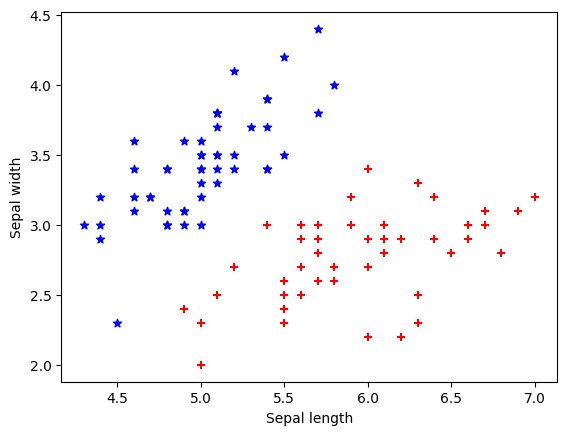

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='*',color='blue')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='+',color='red')
plt.show()

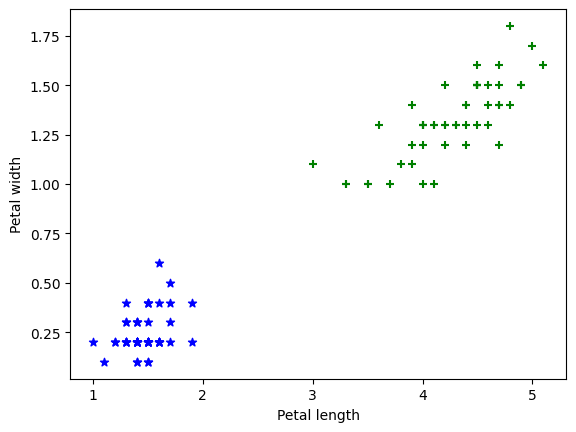

In [10]:
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='*',color='blue')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='+',color='green')
plt.show()

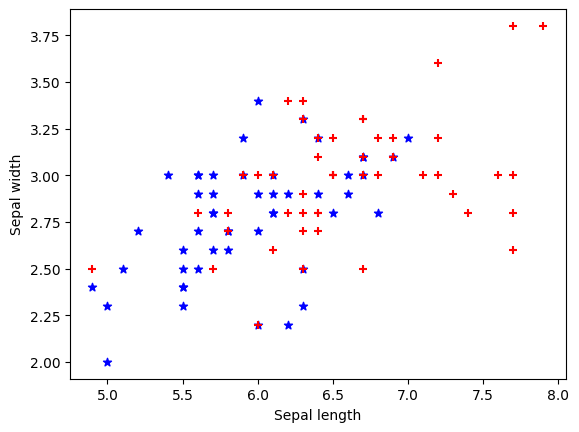

In [12]:
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='+',color='red')
plt.show()

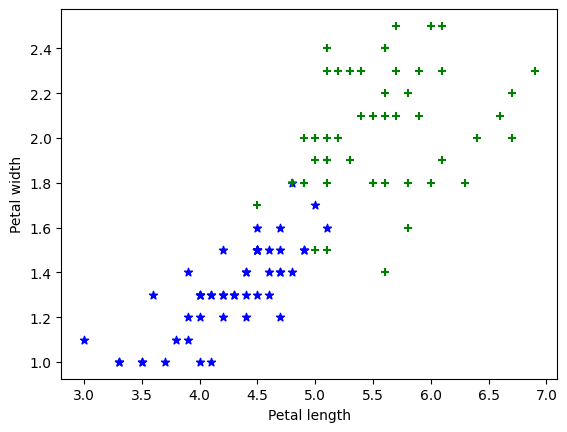

In [13]:
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='+',color='green')
plt.show()

In [14]:
X = df.drop(['target','flower_name'],axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape,X_test.shape)

(112, 4) (38, 4)


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean')

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [62]:
knn.score(X_test,y_test)

0.9210526315789473

In [18]:
flower = {0:'Iris-setosa',2:'Iris-virginica',1:'Iris-Versicolor'}
flower[knn.predict([[5.2,3.1,1.4,0.2]])[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Iris-setosa'

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_temp = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_temp.fit(X_train,y_train)
knn_temp.score(X_test,y_test)

0.9473684210526315

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_temp = KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn_temp.fit(X_train,y_train)
knn_temp.score(X_test,y_test)

0.9473684210526315

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_temp = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_temp.fit(X_train,y_train)
knn_temp.score(X_test,y_test)

0.9736842105263158

### Question 1

In [23]:
pdf = pd.read_csv('/content/Data.csv')
pdf.head()

,Record,Age,Marital,Income,Risk
0,1,22,Single,"$46,156.98",Bad loss
1,2,33,Married,"$24,188.10",Bad loss
2,3,28,Other,"$28,787.34",Bad loss
3,4,51,Other,"$23,886.72",Bad loss
4,5,25,Single,"$47,281.44",Bad loss


In [25]:
pdf.Risk.unique()

array(['Bad loss', 'Good risk', '?'], dtype=object)

In [26]:
pdf.head(9)

,Record,Age,Marital,Income,Risk
0,1,22,Single,"$46,156.98",Bad loss
1,2,33,Married,"$24,188.10",Bad loss
2,3,28,Other,"$28,787.34",Bad loss
3,4,51,Other,"$23,886.72",Bad loss
4,5,25,Single,"$47,281.44",Bad loss
5,6,39,Single,"$33,994.90",Good risk
6,7,54,Single,"$28,716.50",Good risk
7,8,55,Married,"$49,186.75",Good risk
8,9,50,Married,"$46,726.50",Good risk


In [48]:
"""import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean

# Load the dataset
data = pd.read_csv('/content/Data.csv')

# Extract the feature matrix and the target vector
X = data[['Age', 'Income']].values
y = data['Risk'].values
data['Income'] = data['Income'].str.replace('$', '')
"""
# Standardize the feature matrix using min-max standardization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Add the new record to the feature matrix
new_record = [[66, 1, 36120.34]]
X_scaled = np.concatenate((X_scaled, new_record))

# Perform k-NN classification
k = 9
distances = []
for i in range(len(X_scaled)):
    if i != 9:  # Exclude the new record from the distance calculation
        distance = euclidean(X_scaled[9], X_scaled[i])
        distances.append((i, distance))

# Sort the distances and get the indices of the k-closest records
distances.sort(key=lambda x: x[1])
k_indices = [d[0] for d in distances[:k]]

# Perform unweighted voting
votes = {'Bad loss': 0, 'Good risk': 1}
for i in k_indices:
    votes[y[i]] += 1

# Classify the new record based on the majority vote
new_record_risk = max(votes, key=votes.get)

print(f'The risk factor for the new record is: {new_record_risk}')

The risk factor for the new record is: Bad loss


In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean

# Load the dataset
data = pd.read_csv('/content/Data.csv')

# Extract the feature matrix and the target vector

data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)

#print(df)
data.head()

,Record,Age,Marital,Income,Risk
0,1,22,Single,46156.98,Bad loss
1,2,33,Married,24188.10,Bad loss
2,3,28,Other,28787.34,Bad loss
3,4,51,Other,23886.72,Bad loss
4,5,25,Single,47281.44,Bad loss


In [47]:
data['Marital'] = data['Marital'].map({'Single':0,'Married':1,'Other':2})
X = data[['Age', 'Marital','Income']].values
y = data['Risk'].values

In [42]:
data.head(10)

,Record,Age,Marital,Income,Risk
0,1,22,Single,46156.98,Bad loss
1,2,33,Married,24188.10,Bad loss
2,3,28,Other,28787.34,Bad loss
3,4,51,Other,23886.72,Bad loss
4,5,25,Single,47281.44,Bad loss
5,6,39,Single,33994.90,Good risk
6,7,54,Single,28716.50,Good risk
7,8,55,Married,49186.75,Good risk
8,9,50,Married,46726.50,Good risk
9,10,66,Married,36120.34,?


In [49]:
X = data[['Age', 'Marital','Income']][:9].values
y = data['Risk'][:9].values

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn1 = KNeighborsClassifier(n_neighbors=9,metric='manhattan')
knn2=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
knn.fit(X,y)
knn1.fit(X,y)
knn2.fit(X,y)

KNeighborsClassifier(n_neighbors=9)

In [54]:
risk = {0:'Bad Loss',1:'Good Risk'}
knn.predict([[66, 1, 36120.34]])

array(['Bad loss'], dtype=object)

In [55]:
knn1.predict([[66, 1, 36120.34]])

array(['Bad loss'], dtype=object)

In [56]:
knn2.predict([[66, 1, 36120.34]])

array(['Bad loss'], dtype=object)

In [57]:
data.head()

,Record,Age,Marital,Income,Risk
0,1,22,0,46156.98,Bad loss
1,2,33,1,24188.10,Bad loss
2,3,28,2,28787.34,Bad loss
3,4,51,2,23886.72,Bad loss
4,5,25,0,47281.44,Bad loss


,Record,Age,Marital,Income,Risk
0,1,22,0,46156.98,Bad loss
1,2,33,1,24188.10,Bad loss
2,3,28,2,28787.34,Bad loss
3,4,51,2,23886.72,Bad loss
4,5,25,0,47281.44,Bad loss
